In [1]:
# autoreload libraries automatically when making changes
%load_ext autoreload
%autoreload 2

In [2]:
# import PiSwap models
from lib.market import PiSwapMarket
from lib.account import Account
from lib.types import TokenType

In [3]:
# create a new market instance
market = PiSwapMarket()
# set up investors with initial ETH balances
A = Account("A", 10000000)
B = Account("B", 10000000)
C = Account("C", 10000000)

In [4]:
# pay 1 eth to mint bull and bear tokens
minted_bull_bear = market.mint(A, 1)

Transactions:
TRANSFER: A 1 ETH => Market
MINT: 9900.990099009941 BULL => A
MINT: 9900.990099009941 BEAR => A
_________________________________________________
Token price
Mint: 0.00010201010303489966 0.00010201010303489966
_________________________________________________

Cannot get NFT price, swap not initialized
_________________________________________________

A balance: 9999999ETH 9900.99BULL 9900.99BEAR 0LT


In [5]:
# burn 1000 tokens and receive eth
amount_eth = market.burn(A, 1000)

Transactions:
BURN: A => 1000 BULL
BURN: A => 1000 BEAR
TRANSFER: Market 0.10190707385540065 ETH => A
_________________________________________________
Token price
Mint: 0.00010180435427287193 0.00010180435427287193
_________________________________________________

Cannot get NFT price, swap not initialized
_________________________________________________

A balance: 9999999.1ETH 8900.99BULL 8900.99BEAR 0LT


In [6]:
# add initial liquidity
amount_eth = 1
amount_bull = 1000
amount_bear = 500
amount_liquidity_tokens = market.initializePool(A, amount_eth, amount_bull, amount_bear)

Transactions:
TRANSFER: A 1000 BULL => Swap
TRANSFER: A 500 BEAR => Swap
TRANSFER: A 1 ETH => Swap
MINT: 1 LIQUIDITY => A
_________________________________________________
Token price
Mint: 0.00010180435427287193 0.00010180435427287193
Swap: 0.0003336670003336595 0.0013360053440213404
_________________________________________________

Pool sizes
BULL: 1000 tokens & 0.33333 ETH
BEAR: 500 tokens & 0.66667 ETH
_________________________________________________

Buying certifictes for 0.001 ETH:
Bull swap: Tokens out: 2.99103 Average price: 0.00033 ETH
Bear swap: Tokens out: 0.74888 Average price: 0.00134 ETH
_________________________________________________

Selling 1 certifictes:
Bull swap: ETH out: 0.00033 Average price: 0.00033 ETH
Bear swap: ETH out: 0.00133 Average price: 0.00133 ETH
_________________________________________________

NFT Value: 0.5ETH
_________________________________________________

A balance: 9999998.1ETH 7900.99BULL 8400.99BEAR 1LT


In [7]:
# add more liquidity
# disable logging, by passing parameter
amount_liquidity_tokens = market.addLiquidity(A, 1, log=False)
print(amount_liquidity_tokens)

Transactions:
TRANSFER: A 1000.0 BULL => Swap
TRANSFER: A 500.0 BEAR => Swap
TRANSFER: A 1 ETH => Swap
MINT: 1.0 LIQUIDITY => A
_________________________________________________
1.0


In [8]:
# remove liquidity
amount_eth, amount_bull, amount_bear = market.removeLiquidity(A, 0.5)

Transactions:
BURN: A => 0.5 LIQUIDITY
TRANSFER: Swap 0.5 ETH => A
TRANSFER: Swap 500.0 BULL => A
TRANSFER: Swap 250.0 BEAR => A
_________________________________________________
Token price
Mint: 0.00010180435427287193 0.00010180435427287193
Swap: 0.00033355570380255717 0.001335113484646211
_________________________________________________

Pool sizes
BULL: 1500.0 tokens & 0.5 ETH
BEAR: 750.0 tokens & 1.0 ETH
_________________________________________________

Buying certifictes for 0.001 ETH:
Bull swap: Tokens out: 2.99401 Average price: 0.00033 ETH
Bear swap: Tokens out: 0.74925 Average price: 0.00133 ETH
_________________________________________________

Selling 1 certifictes:
Bull swap: ETH out: 0.00033 Average price: 0.00033 ETH
Bear swap: ETH out: 0.00133 Average price: 0.00133 ETH
_________________________________________________

NFT Value: 0.5ETH
_________________________________________________

A balance: 9999997.6ETH 7400.99BULL 8150.99BEAR 1.5LT


In [9]:
# sell tokens
amount_out = market.swap(A, TokenType.BEAR, False, 100)
print(amount_out)

Transactions:
TRANSFER: A 100 BEAR => Swap
TRANSFER: Swap 0.11764705882352944 ETH => A
_________________________________________________
Token price
Mint: 0.00010180435427287193 0.00010180435427287193
Swap: 0.00033355570380255717 0.0010392849719392805
_________________________________________________

Pool sizes
BULL: 1500.0 tokens & 0.5 ETH
BEAR: 850.0 tokens & 0.88235 ETH
_________________________________________________

Buying certifictes for 0.001 ETH:
Bull swap: Tokens out: 2.99401 Average price: 0.00033 ETH
Bear swap: Tokens out: 0.96224 Average price: 0.00104 ETH
_________________________________________________

Selling 1 certifictes:
Bull swap: ETH out: 0.00033 Average price: 0.00033 ETH
Bear swap: ETH out: 0.00104 Average price: 0.00104 ETH
_________________________________________________

NFT Value: 0.57ETH
_________________________________________________

A balance: 9999997.72ETH 7400.99BULL 8050.99BEAR 1.5LT
0.11764705882352944


In [10]:
# buy tokens
amount_out = market.swap(B, TokenType.BULL, True, 0.1)
print(amount_out)

Transactions:
TRANSFER: B 0.1 ETH => Swap
TRANSFER: Swap 250.0 BULL => B
_________________________________________________
Token price
Mint: 0.00010180435427287193 0.00010180435427287193
Swap: 0.00048038430744601346 0.0010392849719393915
_________________________________________________

Pool sizes
BULL: 1250.0 tokens & 0.6 ETH
BEAR: 850.0 tokens & 0.88235 ETH
_________________________________________________

Buying certifictes for 0.001 ETH:
Bull swap: Tokens out: 2.07987 Average price: 0.00048 ETH
Bear swap: Tokens out: 0.96224 Average price: 0.00104 ETH
_________________________________________________

Selling 1 certifictes:
Bull swap: ETH out: 0.00048 Average price: 0.00048 ETH
Bear swap: ETH out: 0.00104 Average price: 0.00104 ETH
_________________________________________________

NFT Value: 0.68ETH
_________________________________________________

B balance: 9999999.9ETH 250.0BULL 0BEAR 0LT
250.0


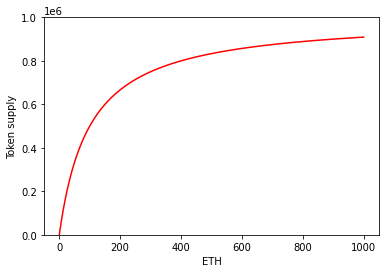

In [11]:
# number of supply of tokens based on deposited eth 
import matplotlib.pyplot as plt
import numpy as np
from lib.formula import *
x = np.arange(0.0, 1000, 0.001)
plt.plot(x, token_formula(x), 'r-')
plt.ylim((0, factor))
plt.xlabel("ETH")
plt.ylabel("Token supply")
plt.show()